Saving runway.png to runway.png
Image loaded successfully


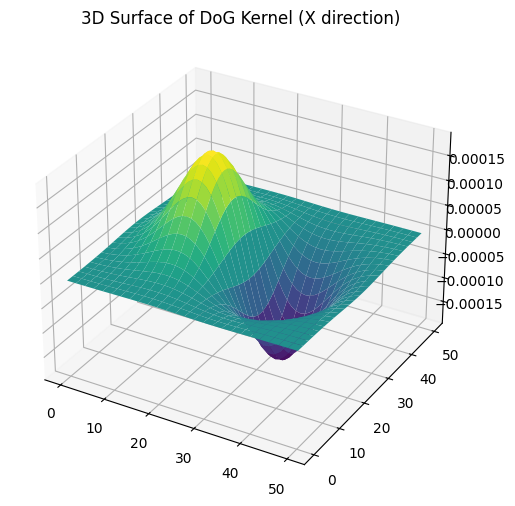

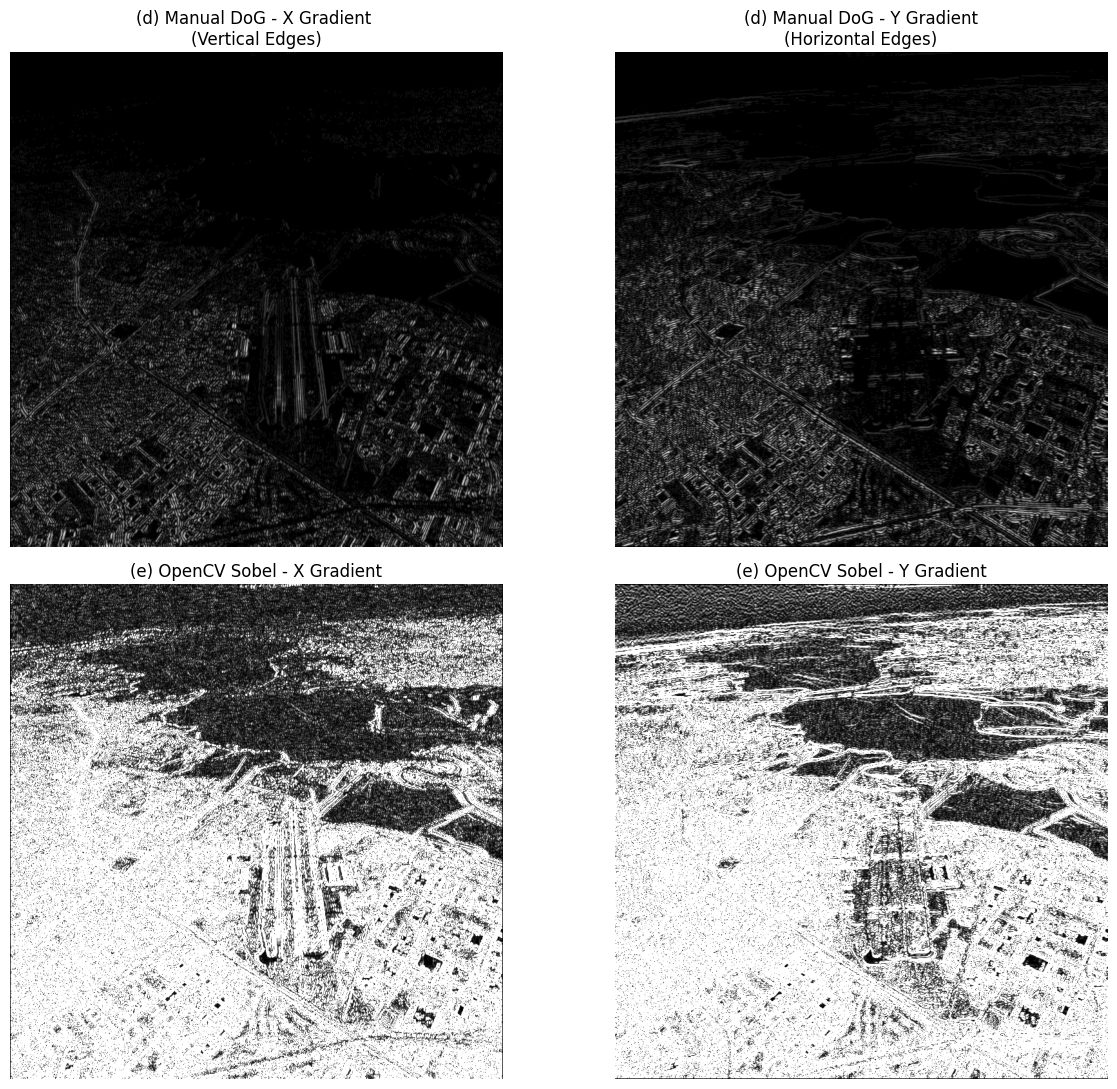

In [30]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from mpl_toolkits.mplot3d import Axes3D

# Upload image
uploaded = files.upload()
img_name = list(uploaded.keys())[0]
img = cv.imread(img_name, cv.IMREAD_GRAYSCALE)

# Create DoG kernels
def get_dog_kernels(size, sigma):
    c = size // 2
    kx = np.zeros((size, size))
    ky = np.zeros((size, size))

    const = 1 / (2 * np.pi * sigma**2)

    for i in range(size):
        for j in range(size):
            x = i - c
            y = j - c
            g = const * np.exp(-(x*x + y*y) / (2 * sigma**2))

            kx[j, i] = -(x / sigma**2) * g
            ky[j, i] = -(y / sigma**2) * g

    return kx, ky

if img is None:
    print("ERROR: Image not loaded")
else:
    print("Image loaded successfully")

    # Create 5x5 DoG kernels
    sigma = 2
    dog_x, dog_y = get_dog_kernels(5, sigma)

    # 3D plot of large kernel (51x51)
    size_viz = 51
    sigma_viz = 8
    viz_x, _ = get_dog_kernels(size_viz, sigma_viz)

    X, Y = np.meshgrid(np.arange(size_viz), np.arange(size_viz))

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, viz_x, cmap='viridis')
    ax.set_title('3D Surface of DoG Kernel (X direction)')
    plt.show()

    # Apply manual DoG filters
     # Apply X-derivative kernel
    gx = cv.filter2D(img, cv.CV_64F, dog_x)
     # Apply Y-derivative kernel
    gy = cv.filter2D(img, cv.CV_64F, dog_y)

    gx = cv.convertScaleAbs(gx)
    gy = cv.convertScaleAbs(gy)

    # Sobel filters
    # Sobel X (Vertical Edges)
    sx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
    # Sobel Y (Horizontal Edges)
    sy = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

    sx = cv.convertScaleAbs(sx)
    sy = cv.convertScaleAbs(sy)

    # Show results
    plt.figure(figsize=(13, 11))

    # Manual DoG
    plt.subplot(2,2,1)
    plt.imshow(gx, cmap='gray')
    plt.title('(d) Manual DoG - X Gradient \n(Vertical Edges)')
    plt.axis('off')

    plt.subplot(2,2,2)
    plt.imshow(gy, cmap='gray')
    plt.title('(d) Manual DoG - Y Gradient\n(Horizontal Edges)')
    plt.axis('off')

    # OpenCV Sobel
    plt.subplot(2,2,3)
    plt.imshow(sx, cmap='gray')
    plt.title('(e) OpenCV Sobel - X Gradient')
    plt.axis('off')

    plt.subplot(2,2,4)
    plt.imshow(sy, cmap='gray')
    plt.title('(e) OpenCV Sobel - Y Gradient')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
